# Análise Multivariada e Aprendizado Não-Supervisionado

por Cibele Russo.

Adaptado de material de Fernando Vendrameto, Gustavo Sutter e Matheus Gomes

ICMC USP São Carlos.


## Aula 10b: Análise de Agrupamentos - Aplicação em Python



Vamos avaliar alguns indicadores sócios-económicos (inflação, PIB per capita, Crescimento do PIB e desemprego) dos países no ano de 2018, disponíveis na base de dados do Banco Mundial, World_Bank.csv.

1. Descreva os dados utilizando ferramentas descritivas e exploratórias adequadas,observando a natureza das variáveis presentes no conjunto de dados.

2. Desenvolva um agrupamento hierárqico via dendrograma. Determine o número de clusters adequado. Justifique sua resposta, identificando qual foi o critério utilizado.

3. Considere um subconjunto dos dados com os seguintes países:
    Brasil, China, Uruguai, Paraguai, Chile, Peru, Bolívia, Equador, Colombia, Alemanha, Estados Unidos, Reino Unido, Polônia.

    Desenvolva analises de agrupamentos utilizando técnicas hierárquicas e não hierárquicas. Justifique adequadamente a escolha da quantidade de grupos.
    


## Agrupamento hierárquico via dendrograma

In [ ]:
# ! pip install geopandas

In [ ]:
# ! pip install descartes

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
import geopandas

import warnings
warnings.filterwarnings('ignore')

sns.set()


In [6]:
df = pd.read_csv("/home/cibele/CibelePython/AMANS/Aula 10/World_Bank.csv",sep=' ')
df.head()

,inflacao,pib_per_capita,crescimento_pib,desemprego
United Arab Emirates,3.068147,43004.948646,1.423840,2.575
Albania,2.020790,5253.630064,4.004413,13.898
Armenia,2.520234,4212.070943,5.200000,17.712
Angola,20.190374,3432.385736,-2.133493,7.253
Austria,1.998382,51512.905475,2.729083,4.786


In [7]:
df.shape

(134, 4)

In [8]:
df.describe()

,inflacao,pib_per_capita,crescimento_pib,desemprego
count,134.000000,134.000000,134.000000,134.000000
mean,3.561733,17596.639838,3.408318,6.846358
std,3.797585,22718.772784,2.228776,5.373266
min,-2.814698,275.429603,-3.815710,0.142000
25%,1.507143,2564.751352,1.892515,3.373500
50%,2.517135,7253.779541,3.110311,5.324000
75%,4.283929,23128.944589,4.876709,8.891250
max,23.563515,114340.498742,8.671683,26.958000


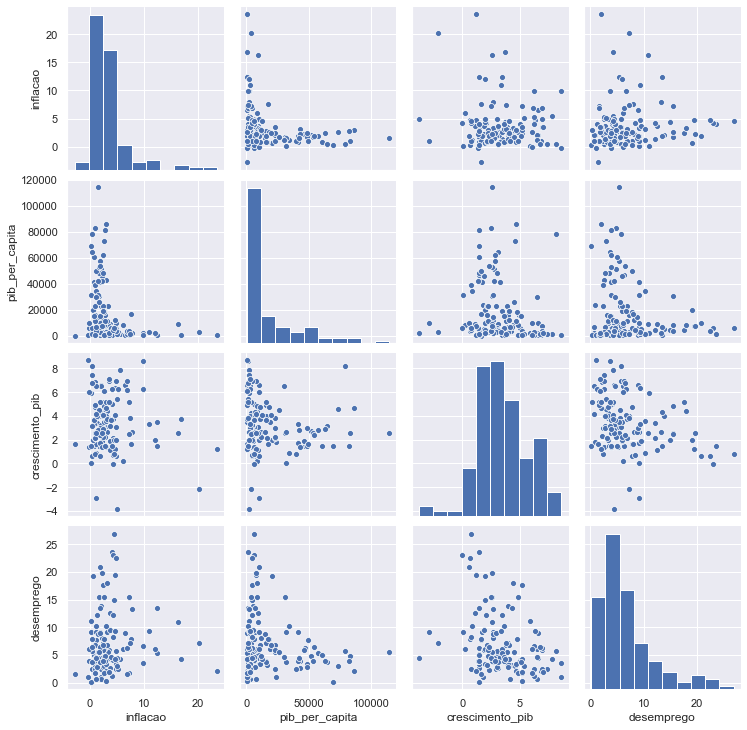

In [9]:
sns.pairplot(df)

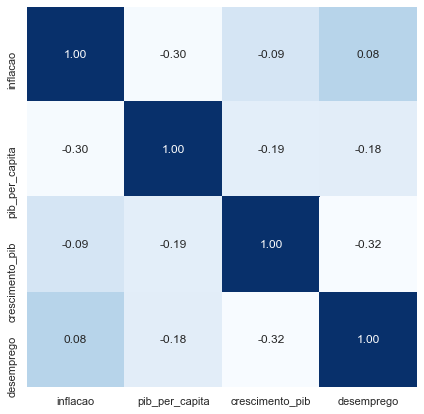

In [10]:
plt.figure(figsize=(7, 7))
corr = np.corrcoef(df.values, rowvar=False)
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f', cbar=False, xticklabels=df.columns, yticklabels=df.columns)

In [11]:
df_scaled = df.copy()
df_scaled.iloc[:, :] = StandardScaler().fit_transform(df)


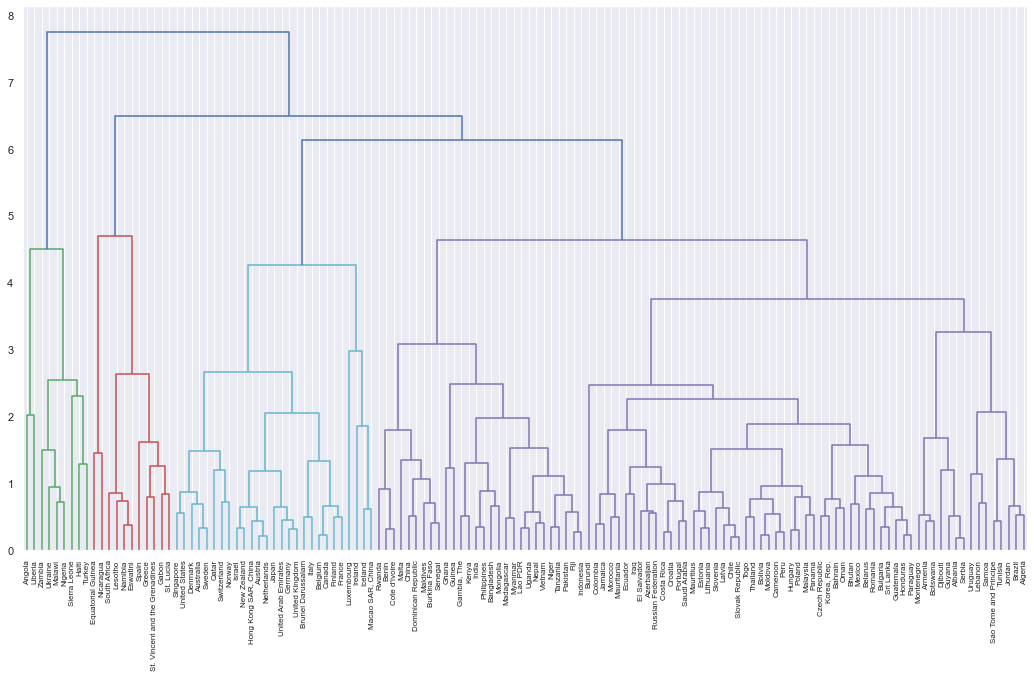

In [13]:
Z = hierarchy.linkage(df_scaled, 'complete')
plt.figure(figsize=(18, 10))
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(df.index), leaf_font_size=8)

In [14]:
paises_interesse = ['Brazil',
                    'China',
                    'Uruguay',
                    'Paraguay',
                    'Chile',
                    'Peru',
                    'Bolivia',
                    'Ecuador',
                    'Colombia',
                    'Germany',
                    'United States',
                    'United Kingdom',
                    'Poland']

df_paises = df_scaled.loc[paises_interesse, :]
print(df_paises.shape)


(13, 4)


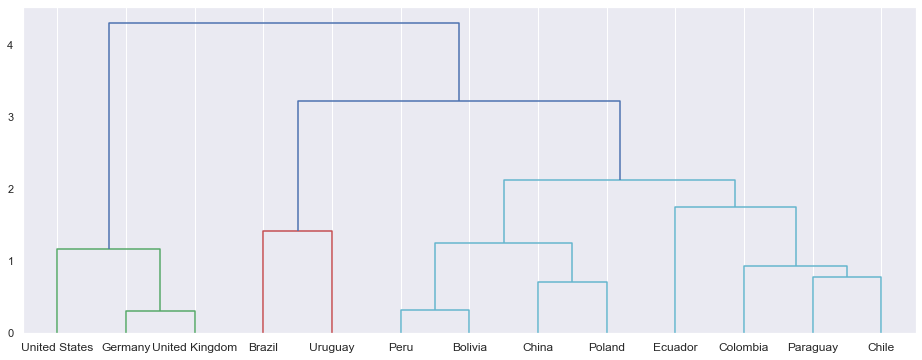

In [15]:
Z = hierarchy.linkage(df_paises, 'ward')
plt.figure(figsize=(16, 6))
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(df_paises.index), leaf_font_size=12)



In [16]:
n_clusters = 3
cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
groups = cluster.fit_predict(df_paises)



In [17]:
groups

array([2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0])

In [18]:
countries = list(df_paises.index)
grouped_countries = {i: [] for i in range(n_clusters)}
for country, group in zip(countries, groups):
    grouped_countries[group].append(country)

for gp, ctr in grouped_countries.items():
    print(f'Cluster {gp}: {ctr}\n')

Cluster 0: ['China', 'Paraguay', 'Chile', 'Peru', 'Bolivia', 'Ecuador', 'Colombia', 'Poland']

Cluster 1: ['Germany', 'United States', 'United Kingdom']

Cluster 2: ['Brazil', 'Uruguay']



## Agrupamento não-hierárquico (K-médias)

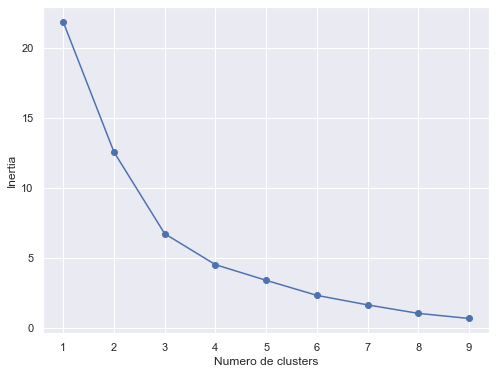

In [20]:
inertias = []
for k in np.arange(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_paises)
    inertias.append(kmeans.inertia_)

# Plotando o gráfico do Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 10), inertias, '-o')
plt.xlabel('Numero de clusters')
plt.ylabel('Inertia');

In [21]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
df_scaled['cluster'] = kmeans.fit_predict(df_scaled)



In [23]:
df_scaled

,inflacao,pib_per_capita,crescimento_pib,desemprego,cluster
United Arab Emirates,-0.130461,1.122580,-0.893730,-0.797911,1
Albania,-0.407292,-0.545334,0.268457,1.317281,2
Armenia,-0.275282,-0.591352,0.806902,2.029755,2
Angola,4.395172,-0.625800,-2.495812,0.075963,2
Austria,-0.413215,1.498476,-0.305901,-0.384885,1
...,...,...,...,...,...
St. Vincent and the Grenadines,-0.327111,-0.451490,-0.383446,2.412518,2
Vietnam,-0.005894,-0.664174,1.651683,-0.925685,0
Samoa,0.168031,-0.583382,-1.208869,0.276217,2
South Africa,0.249206,-0.495834,-1.180513,3.756953,2


In [24]:
countries = list(df_scaled.index)
groups = df_scaled['cluster']

grouped_countries = {i: [] for i in range(n_clusters)}

for country, group in zip(countries, groups):
    grouped_countries[group].append(country)

for gp, ctr in grouped_countries.items():
    print(f'Cluster {gp}: {ctr}\n')



Cluster 0: ['Azerbaijan', 'Bangladesh', 'Burkina Faso', 'Bulgaria', 'Burundi', 'Benin', 'Bolivia', 'Bhutan', 'Belarus', "Cote d'Ivoire", 'Chile', 'Cameroon', 'China', 'Costa Rica', 'Czech Republic', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Estonia', 'Fiji', 'Ghana', 'Gambia, The', 'Guinea', 'Guatemala', 'Honduras', 'Croatia', 'Hungary', 'Indonesia', 'India', 'Kenya', 'Lao PDR', 'Sri Lanka', 'Lithuania', 'Latvia', 'Morocco', 'Moldova', 'Madagascar', 'Myanmar', 'Mongolia', 'Mauritania', 'Malta', 'Mauritius', 'Maldives', 'Mexico', 'Malaysia', 'Niger', 'Nepal', 'Oman', 'Panama', 'Peru', 'Philippines', 'Pakistan', 'Poland', 'Paraguay', 'Romania', 'Russian Federation', 'Rwanda', 'Saudi Arabia', 'Slovenia', 'Slovak Republic', 'Senegal', 'El Salvador', 'Togo', 'Thailand', 'Tanzania', 'Uganda', 'Vietnam', 'Zambia']

Cluster 1: ['United Arab Emirates', 'Austria', 'Australia', 'Belgium', 'Bahrain', 'Brunei Darussalam', 'Canada', 'Switzerland', 'Germany', 'Denmark', 'Finland', 'France', 'Unit

In [25]:
# Dados de paises com informações para plotar

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[['name', 'geometry']]


In [27]:
world

,name,geometry
0,Fiji,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Tanzania,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,W. Sahara,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...
172,Serbia,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Montenegro,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,Kosovo,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,Trinidad and Tobago,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [36]:
# Alguns paises possuem nomes diferentes nos dois conjutos, estamos corrigindo isso
world.loc[world['name'] == 'Brunei', 'name'] = 'Brunei Darussalam'
world.loc[world['name'] == "Côte d'Ivoire", 'name'] = "Cote d'Ivoire"
world.loc[world['name'] == "Czechia", 'name'] = "Czech Republic"
world.loc[world['name'] == "Dominican Rep.", 'name'] = "Dominican Republic"
world.loc[world['name'] == "Gambia", 'name'] = "Gambia, The"
world.loc[world['name'] == "Guinea", 'name'] = "Equatorial Guinea"
world.loc[world['name'] == "Russia", 'name'] = "Russian Federation"
world.loc[world['name'] == "United States of America", 'name'] ="United States"

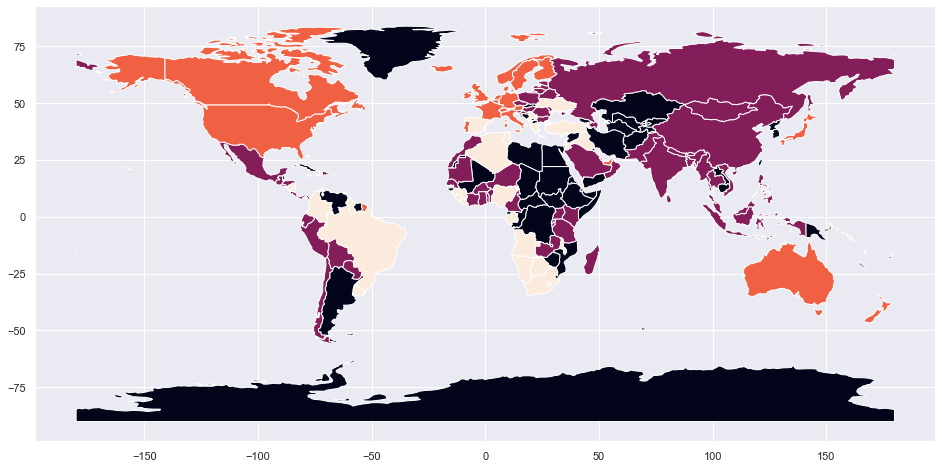

In [44]:
# Juntando os dois conjuntos
all_data = pd.merge(world, df_scaled.reset_index(), how='left', left_on='name', right_on='index')

# Indicando os países que não temos dados (Serão plotados em preto)
all_data.loc[:, 'cluster'] = all_data.loc[:, 'cluster'].fillna(-1)

# Plotando o gráfico
all_data.plot(column='cluster', figsize=(18, 8), );